### About Dataset
### Background

The dataset to be audited was provided which consists of a wide variety of intrusions simulated in a military network environment. It created an environment to acquire raw TCP/IP dump data for a network by simulating a typical US Air Force LAN. The LAN was focused like a real environment and blasted with multiple attacks. A connection is a sequence of TCP packets starting and ending at some time duration between which data flows to and from a source IP address to a target IP address under some well-defined protocol. Also, each connection is labelled as either normal or as an attack with exactly one specific attack type. Each connection record consists of about 100 bytes.

For each TCP/IP connection, 41 quantitative and qualitative features are obtained from normal and attack data (3 qualitative and 38 quantitative features) .The class variable has two categories:

• Normal

• Anomalous

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import xgboost as xgb                     
from xgboost.sklearn import XGBClassifier 
from xgboost.sklearn import XGBRegressor  
from matplotlib import pyplot
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = 12, 8
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [96]:
#import data


df = pd.read_csv("Train_data.csv")

#df = pd.read_csv("/kaggle/input/network-intrusion-detection/Train_data.csv")


df2 = pd.read_csv("Test_data.csv")
#df2 = pd.read_csv("/kaggle/input/network-intrusion-detection/Test_data.csv")

df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [97]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [98]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [99]:
#Check the class distribution 

round(df["class"].value_counts()/len(df)*100, 2)

normal     53.39
anomaly    46.61
Name: class, dtype: float64

<AxesSubplot:xlabel='protocol_type', ylabel='count'>

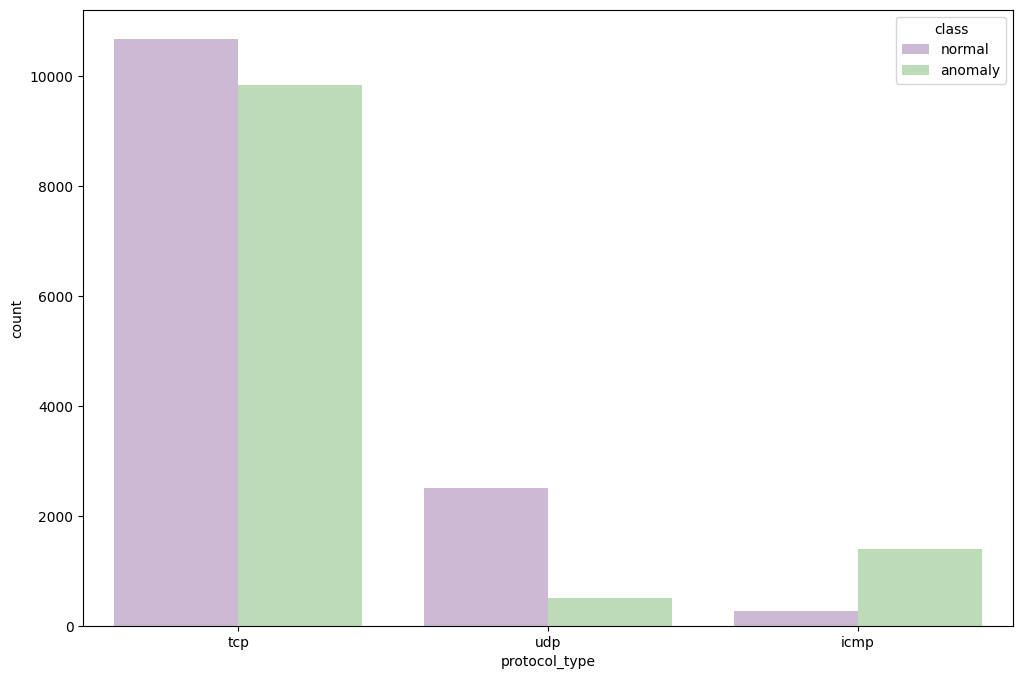

In [100]:
sns.countplot(data=df, x="protocol_type",hue='class', palette='PRGn')

([<matplotlib.patches.Wedge at 0x7efd41230a30>,
 [Text(-0.9189752235681298, 0.6045531725728566, 'tcp'),
  Text(0.7755834478177341, -0.7800450727176964, 'udp'),
  Text(1.0766551991191802, -0.2254186820333187, 'icmp')],
 [Text(-0.5012592128553435, 0.3297562759488308, '81.5%\n(20526)'),
  Text(0.4230455169914913, -0.42547913057328896, '12.0%\n(3011)'),
  Text(0.5872664722468255, -0.12295564474544654, '6.6%\n(1655)')])

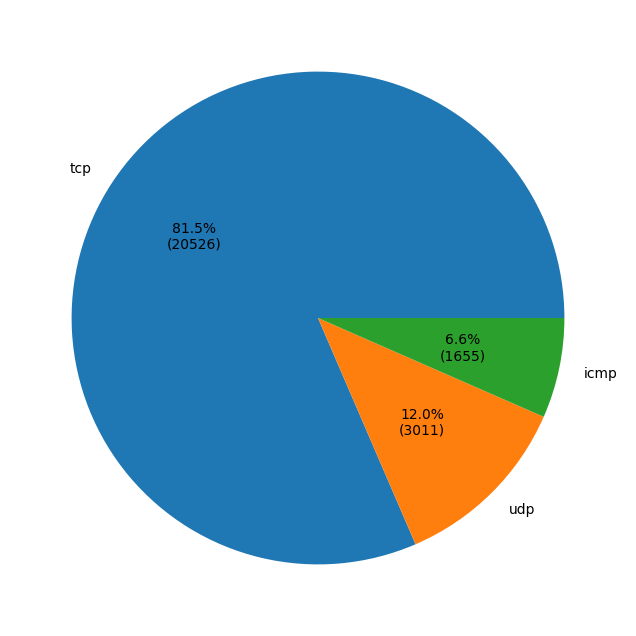

In [101]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

s = df['protocol_type'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s))


<AxesSubplot:xlabel='flag', ylabel='count'>

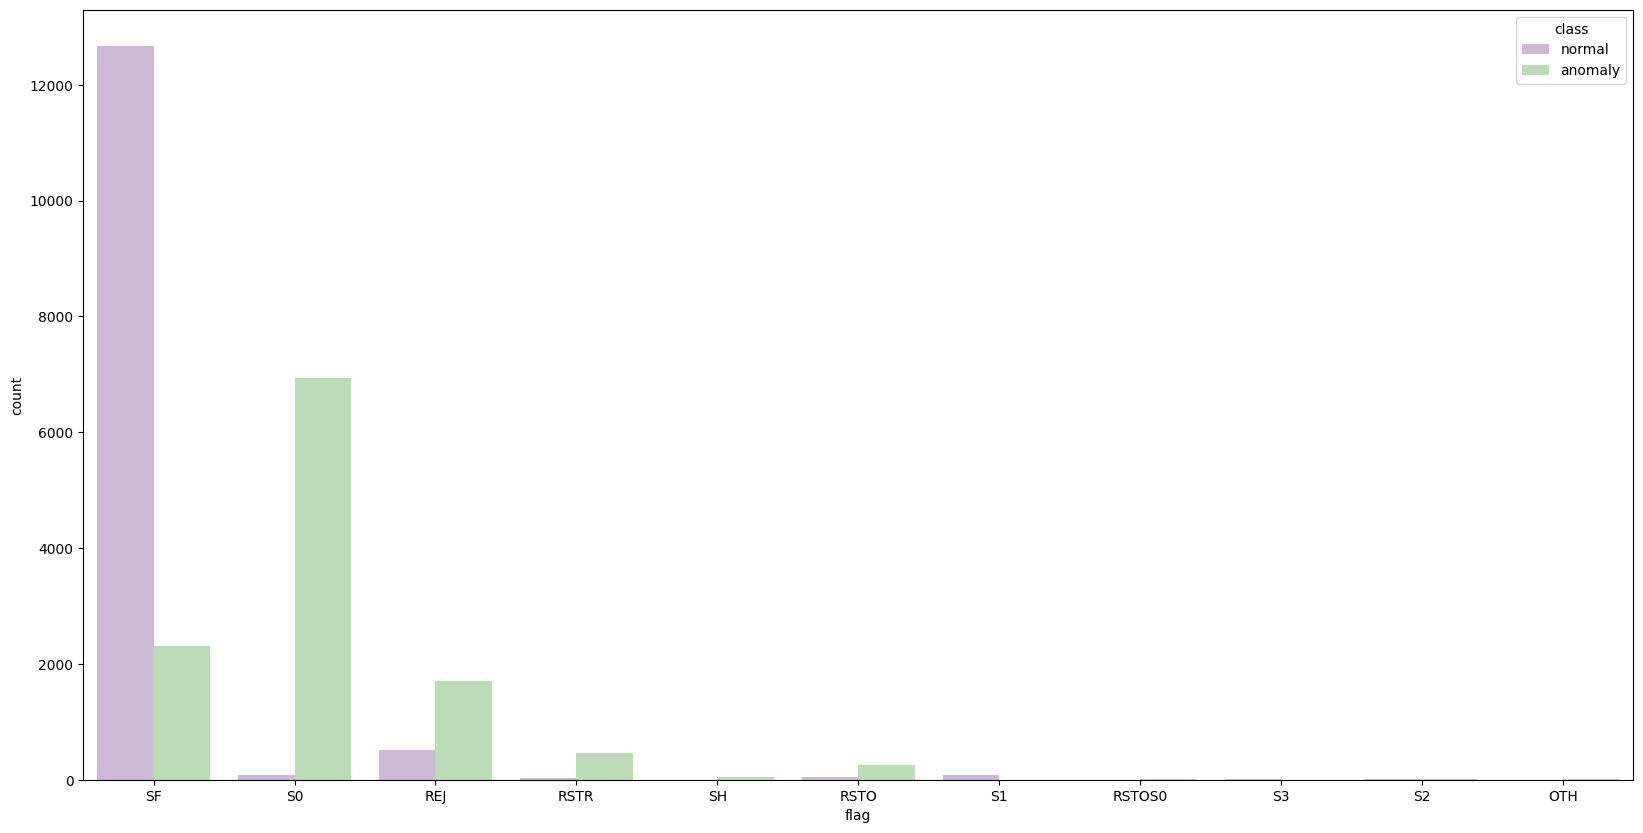

In [102]:
#Evaluate which how classes are distributed inside the flag variable 

plt.figure(figsize=(20,10))
sns.countplot(data=df,x='flag',hue='class',palette='PRGn')

In [104]:
cols = ["protocol_type","service","flag","class"]

df[cols] = df[cols].apply(lambda x: pd.factorize(x)[0] + 1)

df["class"] = np.where(df["class"] == 1, 0, 1)

df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,1,1,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,2,2,1,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,1,3,2,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,1,4,1,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,1,4,1,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,1,44,6,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
25188,0,1,1,1,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1
25189,0,1,3,3,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
25190,0,1,55,2,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


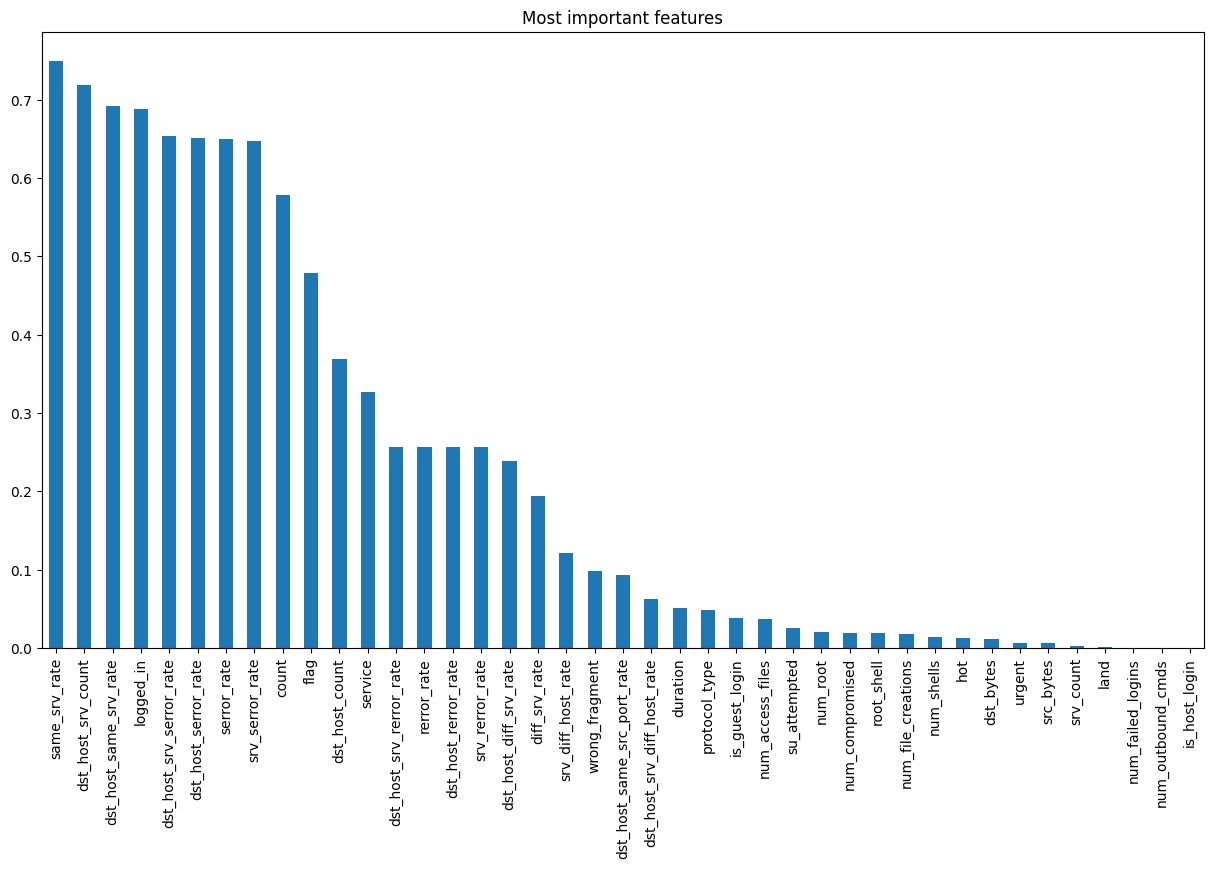

In [105]:
#Let's check the correlation between variables and Fraud 

plt.figure(figsize=(15,8))
d = df.corr()['class'][:-1].abs().sort_values(ascending=False).plot(kind='bar', title='Most important features')

plt.show()

In [106]:
df.corr()['class'][:-1].abs().sort_values(ascending=False)

same_srv_rate                  0.749237
dst_host_srv_count             0.719292
dst_host_same_srv_rate         0.692212
logged_in                      0.688084
dst_host_srv_serror_rate       0.653759
dst_host_serror_rate           0.651050
serror_rate                    0.649952
srv_serror_rate                0.647817
count                          0.578790
flag                           0.479023
dst_host_count                 0.368828
service                        0.326787
dst_host_srv_rerror_rate       0.256999
rerror_rate                    0.256858
dst_host_rerror_rate           0.256312
srv_rerror_rate                0.256152
dst_host_diff_srv_rate         0.238170
diff_srv_rate                  0.193528
srv_diff_host_rate             0.120649
wrong_fragment                 0.097625
dst_host_same_src_port_rate    0.092974
dst_host_srv_diff_host_rate    0.062928
duration                       0.050901
protocol_type                  0.048654
is_guest_login                 0.038662


In [107]:
#df.hist()
#plt.tight_layout()

In [108]:



# Train test split 

# Variables x and target y

x = df.drop(["class"], axis = 1)
y = df["class"]


# Separando entre treinamento e teste

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [109]:
# XGB Classifier

xgb_cl = xgb.XGBClassifier(objective = "binary:logistic"
                        , n_estimators = 100
                        , seed = 42
#                        , scale_pos_weight = 10
                        , colsample_bytree = 0.3
                        , learning_rate = 0.2
                        , max_depth = 5
                        , subsample = 0.8
                        )





avaliacao = [(x_train, y_train), (x_test, y_test)]

xgb_cl.fit(x_train, y_train, eval_metric = ["auc"], eval_set = avaliacao, verbose = True)
resultados_mod = xgb_cl.evals_result()   

[0]	validation_0-auc:0.99267	validation_1-auc:0.99429
[1]	validation_0-auc:0.99698	validation_1-auc:0.99741
[2]	validation_0-auc:0.99907	validation_1-auc:0.99931


/home/user/.local/lib/python3.8/site-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.



[3]	validation_0-auc:0.99936	validation_1-auc:0.99944
[4]	validation_0-auc:0.99918	validation_1-auc:0.99944
[5]	validation_0-auc:0.99939	validation_1-auc:0.99951
[6]	validation_0-auc:0.99947	validation_1-auc:0.99954
[7]	validation_0-auc:0.99957	validation_1-auc:0.99963
[8]	validation_0-auc:0.99961	validation_1-auc:0.99968
[9]	validation_0-auc:0.99963	validation_1-auc:0.99969
[10]	validation_0-auc:0.99967	validation_1-auc:0.99970
[11]	validation_0-auc:0.99971	validation_1-auc:0.99978
[12]	validation_0-auc:0.99975	validation_1-auc:0.99981
[13]	validation_0-auc:0.99974	validation_1-auc:0.99980
[14]	validation_0-auc:0.99975	validation_1-auc:0.99981
[15]	validation_0-auc:0.99978	validation_1-auc:0.99980
[16]	validation_0-auc:0.99980	validation_1-auc:0.99982
[17]	validation_0-auc:0.99981	validation_1-auc:0.99983
[18]	validation_0-auc:0.99981	validation_1-auc:0.99984
[19]	validation_0-auc:0.99984	validation_1-auc:0.99984
[20]	validation_0-auc:0.99985	validation_1-auc:0.99984
[21]	validation_0

In [110]:
#Predictions 

y_pred_train1 = xgb_cl.predict(x_train)
y_pred_test1 = xgb_cl.predict(x_test)

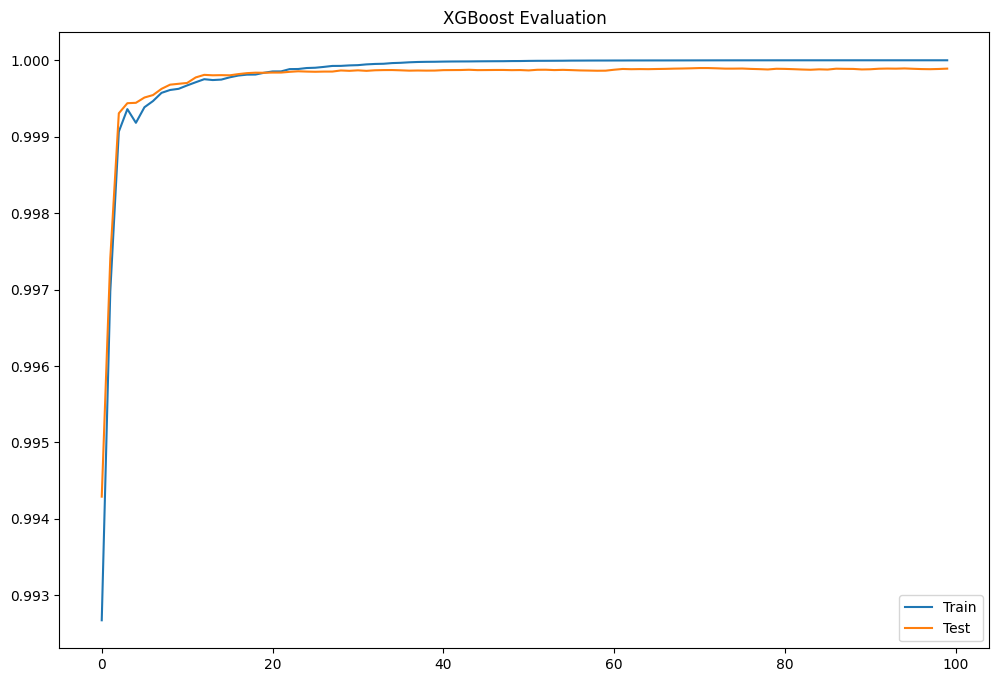

In [111]:
#Checking the evaluation chart, separation between train and test until reaching overfit

x = len(resultados_mod["validation_0"]["auc"])
x_axis = range(0, x)
fig, ax = pyplot.subplots()
ax.plot(x_axis, resultados_mod["validation_0"]["auc"], label = "Train")
ax.plot(x_axis, resultados_mod["validation_1"]["auc"], label = "Test")
plt.title("XGBoost Evaluation");
plt.legend(loc = "lower right");

In [112]:
print("Train")
print("Accuracy: {}%".format(round(accuracy_score(y_train, y_pred_train1)*100, 2)))
print("------------------------------")
print("Test")
print("Accuracy: {}%".format(round(accuracy_score(y_test, y_pred_test1)*100, 2)))

Train
Accuracy: 99.98%
------------------------------
Test
Accuracy: 99.86%


In [113]:
# Train - overfitted 
print("    TRAIN")
print(confusion_matrix(y_train, y_pred_train1))
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report(y_train, y_pred_train1))

    TRAIN
[[10774     1]
 [    3  9375]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10775
           1       1.00      1.00      1.00      9378

    accuracy                           1.00     20153
   macro avg       1.00      1.00      1.00     20153
weighted avg       1.00      1.00      1.00     20153



In [114]:
# Test
print("   TEST")
print(confusion_matrix(y_test, y_pred_test1))
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report(y_test, y_pred_test1))

   TEST
[[2671    3]
 [   4 2361]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2674
           1       1.00      1.00      1.00      2365

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



In [115]:
#Validation 


#y_pred_val = xgb_cl.predict(df2)

# Evaluate the model on the validation data

#submit_sample = pd.DataFrame(df2, columns=["class"])
#submit_sample["class"] = y_pred_val



#submit_sample